# Detecting Credit Card Fraud

# INTRODUCTION (text)

# UNDERSTANDING AND EXPLAINING MACHINE LEARNING ALGORITHMS (text)

# UNDERSTANDING,CLEANING, and VISUALIZING THE DATA (text and code)

In [1]:
#importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [2]:
# reading in files 
df = pd.read_csv('datasets/bs140513_032310.csv')

### Cleaning the Data

In [3]:
# method that removes quotations 
def remove_quotations(x):
    return x.strip("''")

# method that replaces age null value w/ -1 
def age_null(x):
    if x == 'U':
        return -1 
    return x 

# method that encodes gender into a number 
def gender_switch(x):
    if x == 'M':
        return 0
    if x == 'F':
        return 1
    if x == 'E':
        return 2
    else: 
        return -1

# method that cleans dataframe and returns cleaned version 
def clean_transaction(df):
    transaction_dataset = df.copy()
    transaction_dataset['customer'] = transaction_dataset['customer'].apply(remove_quotations) # remove quotation 
    transaction_dataset['age'] = transaction_dataset['age'].apply(remove_quotations).apply(age_null) # remove quotations and replaces null
    transaction_dataset['gender'] = transaction_dataset['gender'].apply(remove_quotations).apply(gender_switch) # remove quotation and encode gender
    transaction_dataset['zipcodeOri'] = transaction_dataset['zipcodeOri'].apply(remove_quotations).astype(int) # remove quotations 
    transaction_dataset['merchant'] = transaction_dataset['merchant'].apply(remove_quotations)
    transaction_dataset['zipMerchant'] = transaction_dataset['zipMerchant'].apply(remove_quotations).astype(int)
    transaction_dataset['category'] = transaction_dataset['category'].apply(remove_quotations)
    # transaction_dataset['category'] = transaction_dataset['category'].apply(encoder_categories)
    return transaction_dataset

In [4]:
clean_transaction = clean_transaction(df)

In [5]:
different_categories = clean_transaction['category'].unique().tolist()
category_dictionary = {} 
iterator = 0 
for i in different_categories:
    category_dictionary[i] = iterator
    iterator += 1  

# method that encodes the transaction categories into numbers 
def encoder_categories(x):
    return category_dictionary[x]

In [6]:
clean_transaction['category'] = clean_transaction['category'].apply(encoder_categories)

In [7]:
clean_transaction.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,C1093826151,4,0,28007,M348934600,28007,0,4.55,0
1,0,C352968107,2,0,28007,M348934600,28007,0,39.68,0
2,0,C2054744914,4,1,28007,M1823072687,28007,0,26.89,0
3,0,C1760612790,3,0,28007,M348934600,28007,0,17.25,0
4,0,C757503768,5,0,28007,M348934600,28007,0,35.72,0


Categories have now been encoded to numbers for easier manipulation. The following dictionary explains what each value means:

In [8]:
category_dictionary

{'es_transportation': 0,
 'es_health': 1,
 'es_otherservices': 2,
 'es_food': 3,
 'es_hotelservices': 4,
 'es_barsandrestaurants': 5,
 'es_tech': 6,
 'es_sportsandtoys': 7,
 'es_wellnessandbeauty': 8,
 'es_hyper': 9,
 'es_fashion': 10,
 'es_home': 11,
 'es_contents': 12,
 'es_travel': 13,
 'es_leisure': 14}

In [9]:
clean_transaction['zipcodeOri'].describe()

count    594643.0
mean      28007.0
std           0.0
min       28007.0
25%       28007.0
50%       28007.0
75%       28007.0
max       28007.0
Name: zipcodeOri, dtype: float64

In [10]:
clean_transaction['zipMerchant'].describe()

count    594643.0
mean      28007.0
std           0.0
min       28007.0
25%       28007.0
50%       28007.0
75%       28007.0
max       28007.0
Name: zipMerchant, dtype: float64

There are 10 columns in the dataset, but the two columns that specify zipcode only
contain one value and should be dropped.

In [11]:
clean_transaction = clean_transaction.drop(['zipcodeOri', 'zipMerchant'], axis=1)

There are 8 columns remaining. Step appears to be represent the time a transaction occurred since the first transaction was made. According to the paper published on researchgate.net, the Age column refers to a categorized age:

**0 --> <=18**

**1 --> 19-25**

**2 --> 26-35**

**3 --> 36-45**

**4 --> 46-55**

**5 --> 56-65**

**6 --> >65**

**U --> Unknown**

The Customer column is a unique ID assigned to each customer. There are customers in the dataset who have made multiple purchases, so this column may be useful to us. Gender represents the gender of a customer: 

**'M' -> Male**

**'F' -> Female**

**'E' -> Enterprise**

**'U' -> Unknown**

The Merchant column refers to a unique ID assigned to each merchant. There are merchants who have facilitated more than one transaction in the dataset, so this column may be useful to us.

Category and amount columns are self-evident, category represents the consumer category to which the purchased item belongs to, and amount refers to the numeric value of the purchase (likely in euros). 

The fraud column is categorized as follows: 0 is indicative of no fraud, 1 means the transaction was a fraud.

Additionally, there are no null values in the dataset, so no values seem to be missing. This makes sense as the dataset we are dealing with is simulated.

## Understanding the Data

## Visualizing the Data

### Transactions Amount

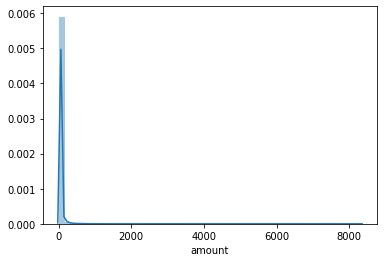

In [12]:
sns.distplot(df.amount)

Mean amount of all the transactions is about 38. On the other side, standard deviation is large and is about 111.

This visualization shows that most of the transactions are not that significant, the data is skewed to the right

### Age count

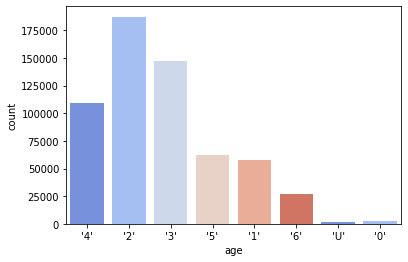

In [13]:
sns.countplot(x='age', data=df, palette=sns.color_palette("coolwarm"))

The most common data age group is 2nd, which according to the original paper is group 26-35.

Second most popular is 36-45

### Gender

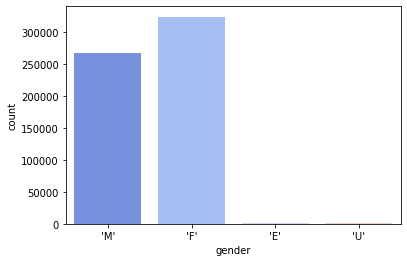

In [14]:
sns.countplot(x='gender', data=df, palette=sns.color_palette("coolwarm")) # title 
# (M vs F (fraud)), maybe change to proportions?

### Categories

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

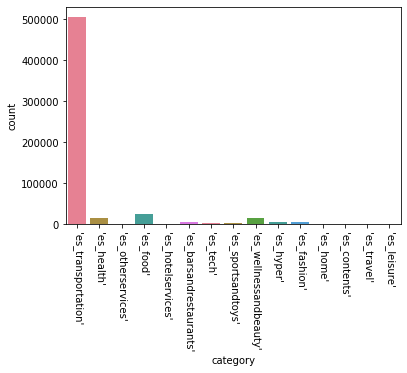

In [15]:
sns.countplot(x='category', data=df, palette=sns.color_palette("husl"))
plt.xticks(rotation=-90) # title (category vs count)

### Frauds by gender

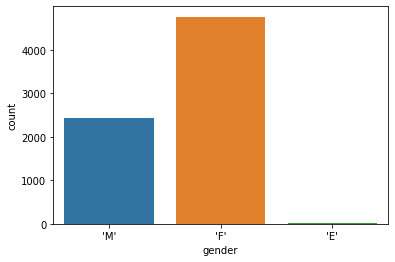

In [16]:
fraud = df[df.fraud != 0]
sns.countplot(x='gender', data=fraud) 

In this dataset females spend more money and these transactions are more likely to be fraudulent than other groups, however we nee to keep in mind that there is more female data in our dataset

### Frauds by age

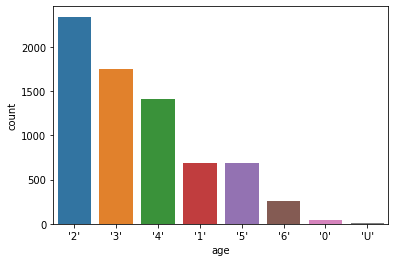

In [17]:
sns.countplot(data=fraud, x='age', order=fraud.age.value_counts().index)

Most fraudulent category is '2' which is age 26-35, same as previous case, this group is most popular in our dataset

### Frauds by category

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

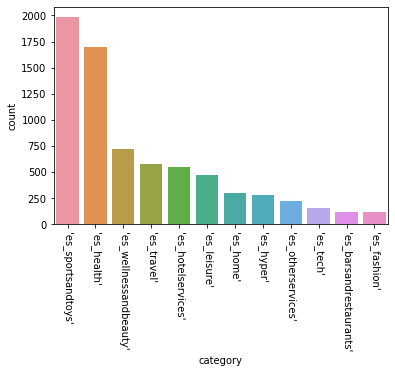

In [19]:
sns.countplot(x='category', data=fraud, order=fraud.category.value_counts().index) #purchases by category for all FRAUDULENT data 
plt.xticks(rotation=-90)

Even though our dataset has more data in transportation, most fraudulent category seems to be sports and toys, and second largest is health.

### Manipulating the Data (text and code)

In [20]:
# a method to get the reliability of a specific category in the given data
def get_fraud_scores(category): 
    fraud_scores = { i : 0 for i in clean_transaction[category].unique() }
    fraud_dict = clean_fraud[category].value_counts().to_dict()
    total_dict = clean_transaction[category].value_counts().to_dict()
    final_fraud = dict((v,k) for k,v in fraud_dict.items()) # Final dictionary with ID as key, reliability as value

    for key in fraud_scores: 
        if key in fraud_dict:
            fraud_scores[key] = fraud_dict[key]/total_dict[key] # reliability = fraudulent purchases / total purchases
    return fraud_scores

In [21]:
# DataFrame containing only fraudulent transactions
clean_fraud = clean_transaction[clean_transaction['fraud'] ==1] 
clean_fraud.head()

,step,customer,age,gender,merchant,category,amount,fraud
88,0,C583110837,3,0,M480139044,1,44.26,1
89,0,C1332295774,3,0,M480139044,1,324.50,1
434,0,C1160421902,3,0,M857378720,4,176.32,1
435,0,C966214713,3,0,M857378720,4,337.41,1
553,0,C1450140987,4,1,M1198415165,8,220.11,1


#### Attempting to assign each customer and merchant a fraud score

In [22]:
customer_fraud_dict = get_fraud_scores('customer') #dictionary with customer ID as key, customer reliability as value
merchant_fraud_dict = get_fraud_scores('merchant') #dictionary with merchant ID as key, merchant reliability as value

Now that we finally have a fraud percentage for each customer, we must insert our new datapoint into our dataset so we can use it for future analysis. 

In [23]:
def return_cust_fraud_percentage(x): # method to navigate customer_fraud dictionary
    return customer_fraud_dict[x]

def return_merch_fraud_percentage(x): # methdo to navigate merchant_fraud dictionary
    return merchant_fraud_dict[x]

clean_transaction['customer_reliability'] = clean_transaction['customer'].apply(return_cust_fraud_percentage)
clean_transaction['merchant_reliability'] = clean_transaction['merchant'].apply(return_merch_fraud_percentage)

clean_fraud = clean_transaction[clean_transaction['fraud'] ==1]  # redefine df_frauds with new categories

In [24]:
clean_transaction['customer_reliability'].describe()

count    594643.000000
mean          0.012108
std           0.055508
min           0.000000
25%           0.000000
50%           0.000000
75%           0.006135
max           0.945652
Name: customer_reliability, dtype: float64

In [25]:
clean_fraud['customer_reliability'].describe()

count    7200.000000
mean        0.266578
std         0.297518
min         0.005348
25%         0.031746
50%         0.092349
75%         0.477273
max         0.945652
Name: customer_reliability, dtype: float64

There is a significant difference in the average customer reliability in fraudulent transactions, suggesting some customers are simply more likely to commit fraud than others.

In [26]:
clean_transaction['merchant_reliability'].describe()

count    594643.000000
mean          0.012108
std           0.080055
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.963351
Name: merchant_reliability, dtype: float64

In [27]:
clean_fraud['merchant_reliability'].describe()

count    7200.000000
mean        0.541401
std         0.298606
min         0.017778
25%         0.250000
50%         0.465792
75%         0.832109
max         0.963351
Name: merchant_reliability, dtype: float64

In [28]:
clean_transaction.head()

,step,customer,age,gender,merchant,category,amount,fraud,customer_reliability,merchant_reliability
0,0,C1093826151,4,0,M348934600,0,4.55,0,0.0,0.0
1,0,C352968107,2,0,M348934600,0,39.68,0,0.0,0.0
2,0,C2054744914,4,1,M1823072687,0,26.89,0,0.0,0.0
3,0,C1760612790,3,0,M348934600,0,17.25,0,0.0,0.0
4,0,C757503768,5,0,M348934600,0,35.72,0,0.0,0.0


There is also a significant difference in the average merchant reliability in a fraudulent transaction. This suggests some merchants are easier to take advantage of (possibly due to poor security practices), and thus are involved in more fraudulent transactions.

In [31]:
# organizing by customer and step
clean_transaction = clean_transaction.sort_values(['customer','step']).reset_index(drop='True')

In [32]:
clean_transaction.head()

,step,customer,age,gender,merchant,category,amount,fraud,customer_reliability,merchant_reliability
0,30,C1000148617,5,0,M1888755466,2,143.87,0,0.007634,0.250000
1,38,C1000148617,5,0,M1741626453,7,16.69,0,0.007634,0.371212
2,42,C1000148617,5,0,M1888755466,2,56.18,0,0.007634,0.250000
3,43,C1000148617,5,0,M840466850,6,14.74,0,0.007634,0.112938
4,44,C1000148617,5,0,M1823072687,0,47.42,0,0.007634,0.000000


In [34]:
# creating additional columns about differences b/w steps and amounts
groups = clean_transaction.groupby('customer').agg({'step':'diff','amount':'diff'})
groups.columns = ['diff_previous_step','diff_previous_amount']

In [36]:
# merging on proper customer id
clean_transaction = clean_transaction.join(groups)

In [37]:
clean_transaction.head()

,step,customer,age,gender,merchant,category,amount,fraud,customer_reliability,merchant_reliability,diff_previous_step,diff_previous_amount
0,30,C1000148617,5,0,M1888755466,2,143.87,0,0.007634,0.250000,NaN,NaN
1,38,C1000148617,5,0,M1741626453,7,16.69,0,0.007634,0.371212,8.0,-127.18
2,42,C1000148617,5,0,M1888755466,2,56.18,0,0.007634,0.250000,4.0,39.49
3,43,C1000148617,5,0,M840466850,6,14.74,0,0.007634,0.112938,1.0,-41.44
4,44,C1000148617,5,0,M1823072687,0,47.42,0,0.007634,0.000000,1.0,32.68


In [39]:
# adding on mean spending amount
customer_mean_spend_amount = clean_transaction.groupby('customer')[['amount']].mean().reset_index()
customer_mean_spend_amount.columns = ['customer','mean_amount']

In [40]:
clean_transaction = pd.merge(clean_transaction,customer_mean_spend_amount)
clean_transaction['diff_from_mean_amount'] = clean_transaction['amount']-clean_transaction['mean_amount']

In [42]:
clean_transaction['age'] = clean_transaction['age'].astype(int)

In [43]:
clean_transaction.head()

,step,customer,age,gender,merchant,category,amount,fraud,customer_reliability,merchant_reliability,diff_previous_step,diff_previous_amount,mean_amount,diff_from_mean_amount
0,30,C1000148617,5,0,M1888755466,2,143.87,0,0.007634,0.250000,NaN,NaN,35.091908,108.778092
1,38,C1000148617,5,0,M1741626453,7,16.69,0,0.007634,0.371212,8.0,-127.18,35.091908,-18.401908
2,42,C1000148617,5,0,M1888755466,2,56.18,0,0.007634,0.250000,4.0,39.49,35.091908,21.088092
3,43,C1000148617,5,0,M840466850,6,14.74,0,0.007634,0.112938,1.0,-41.44,35.091908,-20.351908
4,44,C1000148617,5,0,M1823072687,0,47.42,0,0.007634,0.000000,1.0,32.68,35.091908,12.328092


### Correlation Chart

In [44]:
corr_matrix = clean_transaction.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,step,age,gender,category,amount,fraud,customer_reliability,merchant_reliability,diff_previous_step,diff_previous_amount,mean_amount,diff_from_mean_amount
step,1,0.000192311,0.00110703,-0.0245922,-0.00796142,-0.0118981,0.0366378,-0.0405536,-0.0254017,0.000298665,0.0411304,-0.0197844
age,0.000192311,1,-0.0392227,-0.00177639,-0.00379485,-0.00364603,-0.00718384,-0.00477876,-0.00383342,-0.000146705,-0.0140739,8.67497e-19
gender,0.00110703,-0.0392227,1,0.010147,0.0128877,0.0250473,0.0493512,0.0212488,0.00375172,-0.000163116,0.0477966,-5.62968e-19
category,-0.0245922,-0.00177639,0.010147,1,0.268715,0.278354,0.182106,0.38028,0.164309,0.127814,0.184716,0.227328
amount,-0.00796142,-0.00379485,0.0128877,0.268715,1,0.489967,0.249378,0.481288,0.097239,0.664487,0.269636,0.962962
fraud,-0.0118981,-0.00364603,0.0250473,0.278354,0.489967,1,0.507532,0.73197,0.131276,0.227564,0.4694,0.377376
customer_reliability,0.0366378,-0.00718384,0.0493512,0.182106,0.249378,0.507532,1,0.438433,0.106498,0.000200739,0.924868,-1.88245e-17
merchant_reliability,-0.0405536,-0.00477876,0.0212488,0.38028,0.481288,0.73197,0.438433,1,0.291602,0.22356,0.428276,0.379879
diff_previous_step,-0.0254017,-0.00383342,0.00375172,0.164309,0.097239,0.131276,0.106498,0.291602,1,0.00827579,0.129413,0.0645486
diff_previous_amount,0.000298665,-0.000146705,-0.000163116,0.127814,0.664487,0.227564,0.000200739,0.22356,0.00827579,1,-0.000247529,0.690659


# APPLYING MACHINE LEARNING (text and code) 

In [29]:
model = linear_model 
model.fit([TrainX, TrainY])
predictions = model.predict(Validate_or_test_X)

NameError: name 'linear_model' is not defined